<a href="https://colab.research.google.com/github/Kolojo7/Google_Colab/blob/main/knn%20and%20GNB%20classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data might not be IID in email spam filtering because spam emails learn from what works on people and what doesn't. Because it can learn from past emails and adapt to be more successful. For this reason it cannot be independent. It is not identical for this same reason because it targets people more if they fall for it. Someone could be targeted by AI 100 times and someone else could be targeted 1000 times because they are more susceptible to it causing an uneven spread

2. Training error is relevant to the training data, while hyper-parameters are relevant to testing errors. Training errors are a result of the data, while hyper-parameters are a result of the model. Training errors produce parameters for the data. Test errors produce hyper-parameters for the model.

3. Random trees are a type of decision tree used in ensemble methods like Random Forests. Instead of considering all possible features when making a split, a random tree selects a random subset of features. This approach introduces randomness into the model-building process, helping to create diverse trees that can improve the overall model’s performance and robustness by reducing overfitting and increasing generalization.

4. An advantage of using a a large k value in k-fold cross-validation is that it makes it more generalized which reduces processing power and can go through data faster. A disadvantage is that it increases the training error which decreases the accuracy becomes more and may cause more overfitting

5. Increasing false positives can be an acceptable risk in situations where missing a positive case (false negatives) is more costly or harmful. For example, in pregnancy testing, a false positive (indicating pregnancy when one isn't pregnant) might be considered less harmful than a false negative (failing to detect an actual pregnancy). This is because it is generally more costly and potentially more harmful to miss a pregnancy than to undergo additional testing to confirm a positive result.

6. P(xi) is a constant value in the data set. Because of this we can ignore it because it is the same for all values

7. The two key components of random forests are:
Bootstrapping: a technique for creating multiple "versions" of the dataset
Random trees: a method for building decision trees that introduces randomness into the tree-growing process

k=1 Accuracy: 0.9610678531701891
Confusion Matrix for k=1:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 81  1]
 [ 0  0  0  4  0  2  0  0  0 86]]

k=3 Accuracy: 0.9588431590656284
Confusion Matrix for k=3:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 83  0  1  0  2  2  2]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  2  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]

k=5 Accuracy: 0.9543937708565072
Confusion Matrix for k=5:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  1  0  3  3  1]
 [ 0  0  0  0 86  0  0  1  

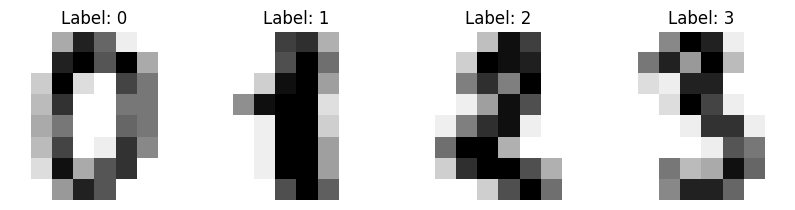

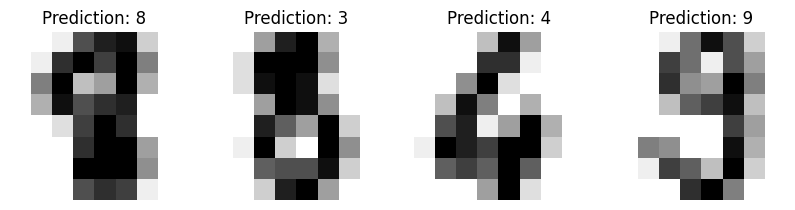

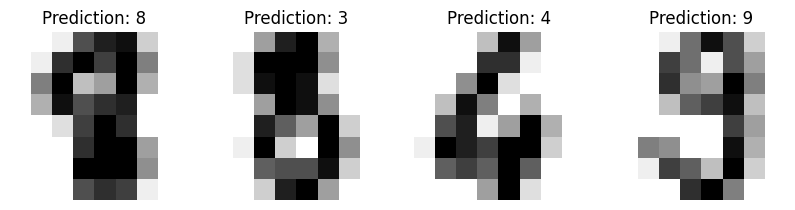

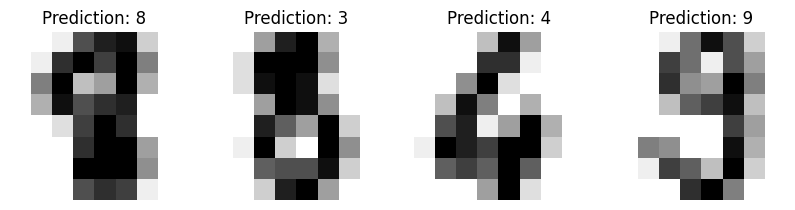

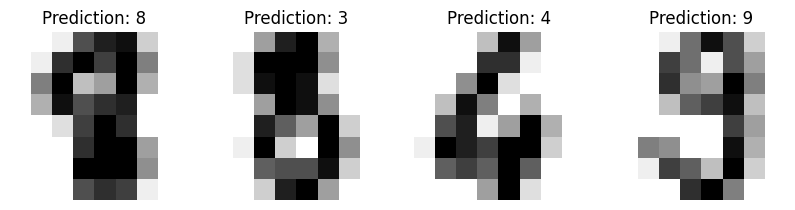

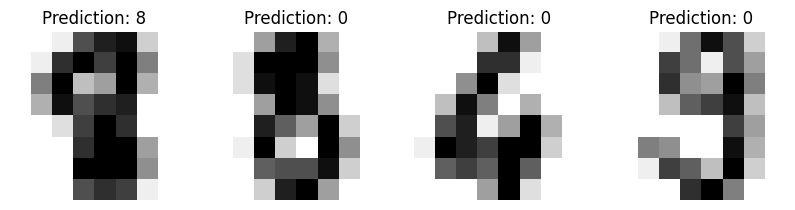

In [ ]:
import numpy as npy
import matplotlib.pyplot as mpplt
from sklearn import datasets as dts, metrics as mtr
from sklearn.model_selection import train_test_split as tts
from collections import Counter as Cntr

# Load the digits dataset
digits = dts.load_digits()

# Display the first 4 images with labels from the dataset
_, axes = mpplt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()  # Hide axes for a cleaner look
    ax.imshow(image, cmap=mpplt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

# Flatten the images into a vector (64 features per image)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split the data into 50% training and 50% testing
X_train, X_test, y_train, y_test = tts(data, digits.target, test_size=0.5, shuffle=False)

# Function to calculate the sum of squared differences (distance metric)
def distanceMetric(x1, x2):
    return npy.sum((x1 - x2) ** 2)

# k-Nearest Neighbors: Predict the label for a test instance
def knn_predict(X_train, y_train, test_instance, k):
    # Calculate distances from the test instance to all training instances
    distances = [distanceMetric(test_instance, x_train) for x_train in X_train]

    # Get the indices of the k closest neighbors
    nearestNeighbors = npy.argsort(distances)[:k]

    # Get the labels of the k closest neighbors
    nearest_labels = [y_train[i] for i in nearestNeighbors]

    # Return the most common label among the neighbors
    most_common_label = Cntr(nearest_labels).most_common(1)[0][0]
    return most_common_label

# Evaluate k-NN for a given value of k
def evaluate_knn(k):
    # Predict labels for all test instances
    predictions = [knn_predict(X_train, y_train, test_instance, k) for test_instance in X_test]

    # Calculate the accuracy and confusion matrix
    accuracy = mtr.accuracy_score(y_test, predictions)
    confusion_matrix = mtr.confusion_matrix(y_test, predictions)
    return accuracy, confusion_matrix

# Gaussian Naive Bayes: Calculate prior probabilities for each class
def calculate_priors(y_train):
    total_samples = len(y_train)
    # Calculate the priors for each unique label
    priors = {label: npy.sum(y_train == label) / total_samples for label in npy.unique(y_train)}
    return priors

# Gaussian Naive Bayes: Calculate mean and variance of features for each class
def calculate_gnb_parameters(X_train, y_train):
    # Mean and variance for each feature in each class
    means = {label: npy.mean(X_train[y_train == label], axis=0) for label in npy.unique(y_train)}
    variances = {label: npy.var(X_train[y_train == label], axis=0) for label in npy.unique(y_train)}
    return means, variances

# Gaussian Naive Bayes: Compute Gaussian probability for a given feature
def gaussian_probability(x, mean, var):
    eps = 1e-6  # Small epsilon to avoid division by zero
    coeff = 1.0 / npy.sqrt(2.0 * npy.pi * var + eps)  # Coefficient
    exponent = npy.exp(-((x - mean) ** 2) / (2 * var + eps))  # Exponent
    return coeff * exponent

# Gaussian Naive Bayes: Predict the class label for a test instance
def gnb_predict(test_instance, priors, means, variances):
    log_posteriors = {}
    for label in priors:
        # Log prior for the class
        log_posterior = npy.log(priors[label])
        # Log likelihood for each feature in the test instance
        likelihoods = gaussian_probability(test_instance, means[label], variances[label])
        log_posterior += npy.sum(npy.log(likelihoods + 1e-6))  # Avoid log(0) with small epsilon
        log_posteriors[label] = log_posterior
    # Return the class with the highest log posterior
    return max(log_posteriors, key=log_posteriors.get)

# Evaluate Gaussian Naive Bayes classifier
def evaluate_gnb(X_test, y_test, priors, means, variances):
    # Predict labels for all test instances
    predictions = [gnb_predict(test_instance, priors, means, variances) for test_instance in X_test]

    # Calculate the accuracy and confusion matrix
    accuracy = mtr.accuracy_score(y_test, predictions)
    confusion_matrix = mtr.confusion_matrix(y_test, predictions)
    return accuracy, confusion_matrix

# Calculate priors, means, and variances for training data
priors = calculate_priors(y_train)
means, variances = calculate_gnb_parameters(X_train, y_train)

# Evaluate Gaussian Naive Bayes
gnb_accuracy, gnb_confusion_matrix = evaluate_gnb(X_test, y_test, priors, means, variances)

# List of k values to test for k-NN
k_values = [1, 3, 5, 100, 500]
knn_results = {}

# Evaluate k-NN for different values of k
for k in k_values:
    accuracy, confusion_matrix = evaluate_knn(k)
    knn_results[k] = {'accuracy': accuracy, 'confusion_matrix': confusion_matrix}

# Print k-NN results
for k, result in knn_results.items():
    print(f'k={k} Accuracy: {result["accuracy"]}')
    print(f'Confusion Matrix for k={k}:\n{result["confusion_matrix"]}\n')

# Print Gaussian Naive Bayes results
print(f'Gaussian Naive Bayes Accuracy: {gnb_accuracy}')
print(f'Confusion Matrix for Gaussian Naive Bayes:\n{gnb_confusion_matrix}')

# Show the plots for the first 4 test images with their predicted labels (for each value of k)
for k in k_values:
    _, axes = mpplt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    predicted_labels = [knn_predict(X_train, y_train, test_instance, k) for test_instance in X_test[:4]]
    for ax, image, prediction in zip(axes, X_test[:4], predicted_labels):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=mpplt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")

# Show plots
mpplt.show()


k=1 Accuracy: 0.9610678531701891
Confusion Matrix for k=1:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 81  1]
 [ 0  0  0  4  0  2  0  0  0 86]]

k=3 Accuracy: 0.9588431590656284
Confusion Matrix for k=3:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 83  0  1  0  2  2  2]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  2  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]

k=5 Accuracy: 0.9543937708565072
Confusion Matrix for k=5:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  1  0  3  3  1]
 [ 0  0  0  0 86  0  0  1  

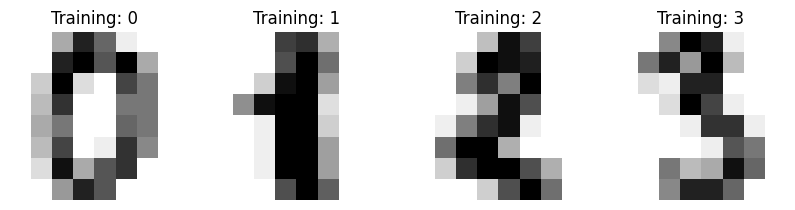

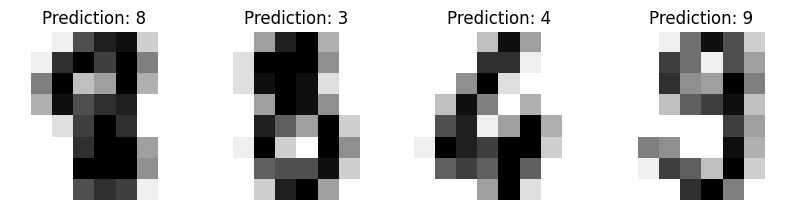

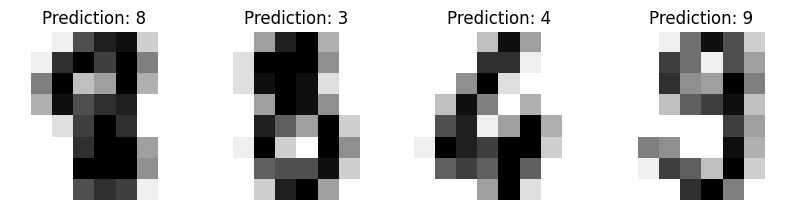

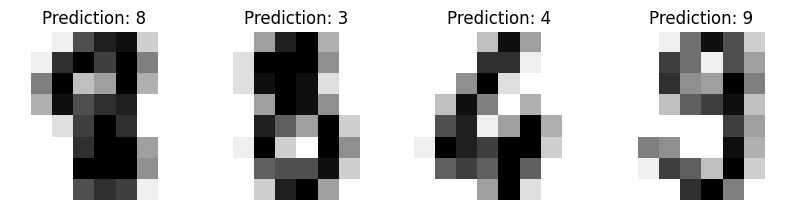

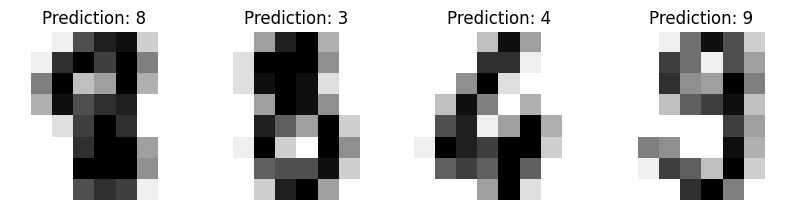

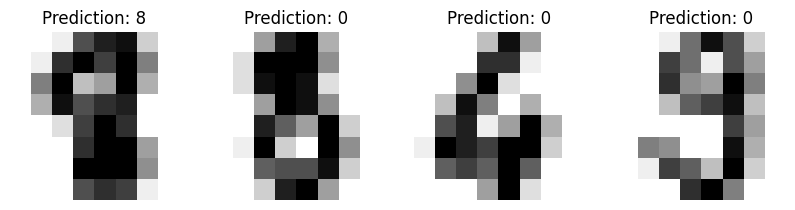

<Figure size 800x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from collections import Counter

# Load digits dataset
digits = datasets.load_digits()

# Showing first 4 training images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Implementing sum of squares distance for kNN
def distanceCalc(x1, x2):
    return np.sum((x1 - x2) ** 2)

# k Nearest Neighbours classifier
def knn(X_train, y_train, X_test_instance, k):
    distances = [distanceCalc(X_test_instance, x_train) for x_train in X_train]
    distancesSorted = np.argsort(distances)
    kNear = [y_train[i] for i in distancesSorted[:k]]
    mostCommon = Counter(kNear).most_common(1)[0][0]
    return mostCommon

# kNN evaluation function
def kCompute(k):
    yPred = [knn(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy = metrics.accuracy_score(y_test, yPred)
    cm = metrics.confusion_matrix(y_test, yPred)
    return accuracy, cm

# Gaussian Naive Bayes Implementation
def priorCalc(y_train):
    priors = {}
    total_samples = len(y_train)
    for label in np.unique(y_train):
        priors[label] = np.sum(y_train == label) / total_samples
    return priors

# Creating function to calculate the parameters of the GNB
def _GNBParameters(X_train, y_train):
    means = {}
    variances = {}
    for label in np.unique(y_train):
        X_train_class = X_train[y_train == label]
        means[label] = np.mean(X_train_class, axis=0)
        variances[label] = np.var(X_train_class, axis=0)
    return means, variances

# Calculating the probability in the GNB process
def _GNBProbability(x, mean, var):
    eps = 1e-6  #
    coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
    exponent = np.exp(- ((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent

# Calculating the predictors for GNB
def _GNBPredict(X_test_instance, priors, means, variances):
    posteriors = {}

    for label in priors:
        posterior = np.log(priors[label])
        likelihoods = _GNBProbability(X_test_instance, means[label], variances[label])
        posterior += np.sum(np.log(likelihoods + 1e-6))
        posteriors[label] = posterior

    return max(posteriors, key=posteriors.get)

# Final calculation of GNB where we compute the accuracy and confusion matrix
def _GNBCompute(X_test, y_test, priors, means, variances):
    y_pred = [_GNBPredict(x_test, priors, means, variances) for x_test in X_test]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return accuracy, cm

# Calculate priors, means, and variances for GNB
priors = priorCalc(y_train)
means, variances = _GNBParameters(X_train, y_train)
# Evaluate the Gaussian Naive Bayes model
gnbAccuracy, gnbConfusionMatrix = _GNBCompute(X_test, y_test, priors, means, variances)

# Each stated value of k to test for kNN and storing the result
k_values = [1, 3, 5, 100, 500]
results = {}

# Evaluate kNN for different values of k
for k in k_values:
    accuracy, cm = kCompute(k)
    results[k] = {'accuracy': accuracy, 'confusion_matrix': cm}

# Print out kNN results
for k, res in results.items():
    print(f'k={k} Accuracy: {res["accuracy"]}')
    print(f'Confusion Matrix for k={k}:\n{res["confusion_matrix"]}\n')

    # Plot first 4 test images with their predicted labels
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    predicted_labels = [knn(X_train, y_train, x_test, k) for x_test in X_test[:4]]
    for ax, image, prediction in zip(axes, X_test[:4], predicted_labels):
        ax.set_axis_off()
        image = image.reshape(8, 8)  # Reshape for visualization
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")

# Print out GNB results
print(f'\nGNB Accuracy: {gnbAccuracy}')
print(f'GNB Confusion Matrix:\n{gnbConfusionMatrix}')

plt.figure(figsize=(8, 6))
plt.show()
